
# Bloc 1 — Sessió 3 · El nostre primer model d'aprenentatge automàtic
**Mòdul 5072 — Sistemes d’Aprenentatge Automàtic**  

Aquesta pràctica guiada et portarà pas a pas a construir el **primer model de regressió lineal simple** amb Python i `scikit-learn`.



## 🎯 Objectius de la sessió
- Carregar i explorar un petit conjunt de dades (hores d’estudi → nota).
- Entrenar un **model de regressió lineal** amb `scikit-learn`.
- Visualitzar les prediccions del model.
- Avaluar el model amb **MSE** i **R²**.
- Interpretar el resultat i fer una predicció nova.



## 🧠 Recordatori ràpid (teoria mínima)
- Un **model** és una funció que rep una entrada $X$ i retorna una predicció $\hat{y}$.
- En regressió lineal simple: $(\hat{y} = w \cdot x + b)$.
- **Error**: diferència entre el valor real $y$ i la predicció $\hat{y}$.
- **Funció cost (MSE)**: $ J(w, b) = \frac{1}{n} \sum (y_i - \hat{y_i})^2$.
- Aprendre = **trobar \(w\)** i **\(b\)** que **minimitzin** el MSE.


## 📊 Què és el coeficient R²?

El **coeficient de determinació** $R^2$ és una mesura estadística que indica **com de bé s'ajusta un model de regressió** a les dades observades.

- El seu valor va entre **0 i 1** (encara que pot ser negatiu en alguns casos).
- Un **R² proper a 1** vol dir que el model explica gairebé tota la variabilitat de les dades.
- Un **R² proper a 0** indica que el model **no explica** gaire bé les dades.

### 🧮 Fórmula conceptual


$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

On:
- $SS_{res} = \sum (y_i - \hat{y_i})^2$ → error residual del model  
- $SS_{tot} = \sum (y_i - \bar{y})^2$ → variabilitat total de les dades  

Així, $R^2$ compara **l’error del model** amb **l’error que tindríem si simplement féssim servir la mitjana de les dades** com a predicció.

### 💬 Interpretació
| Valor de R² | Significat aproximat |
|--------------|----------------------|
| 1.0 | El model explica perfectament les dades |
| 0.8 | El model explica el 80% de la variabilitat |
| 0.5 | El model explica la meitat de la variabilitat |
| 0.0 | El model no explica res millor que la mitjana |
| Negatiu | El model és pitjor que predir la mitjana |

> 💡 **Resum:** com més alt sigui $R^2$, millor s’ajusta el model, però un valor alt **no sempre implica que el model sigui correcte** (pot haver-hi *overfitting*).



## ⚙️ Preparació de l'entorn
Executa la cel·la següent per carregar les llibreries que farem servir.


In [ ]:

!source ia_env/bin/activate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


63691.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



## 📥 Carrega de dades
Intentarem llegir el fitxer `students.csv` (columnes: `hores_estudi`, `nota`).  
Si no existeix, generarem un dataset sintètic equivalent per poder continuar.


In [27]:

import os

csv_path = "students.csv"
data = pd.read_csv(csv_path)

data.head()


,hores_estudi,nota
0,3.75,8.42
1,3.58,9.76
2,3.58,9.23
3,3.15,9.12
4,3.17,10.00



## 👀 Exploració visual
Fem un **gràfic de dispersió** per veure la relació entre hores d’estudi i nota.


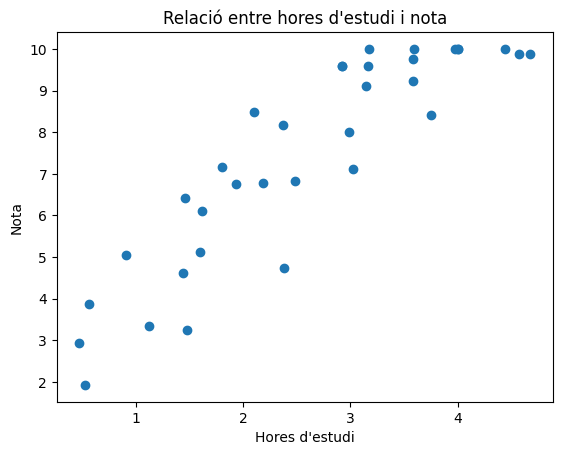

In [28]:

plt.figure()
plt.scatter(data["hores_estudi"], data["nota"])
plt.xlabel("Hores d'estudi")
plt.ylabel("Nota")
plt.title("Relació entre hores d'estudi i nota")
plt.show()



## 🧩 Preparació de variables
- **X**: variable independent (entrada) → `hores_estudi`  
- **y**: variable dependent (objectiu) → `nota`


In [29]:

X = data[["hores_estudi"]]
y = data["nota"]
X.shape, y.shape

((34, 1), (34,))


## 🛠️ Entrenament del model (Regressió lineal)
Entrenem un model amb `LinearRegression` i fem les **prediccions** sobre les mateixes dades.


In [30]:

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

w = model.coef_[0]
b = model.intercept_
w, b

(1.8500385160993191, 2.624121024118554)


## 📈 Visualització de l'ajust del model
Dibuixem els punts i la **línia del model** sobreposada.


In [31]:
X_arr = X.to_numpy().ravel() 
y_arr = y.to_numpy()


order = np.argsort(X_arr)
X_line = X_arr[order]
y_line = y_pred[order]

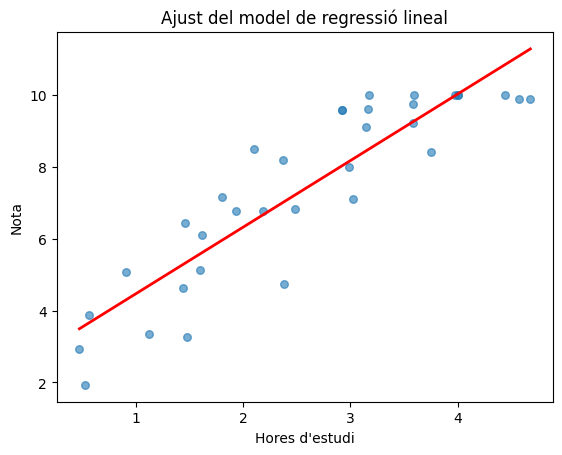

In [34]:
# Convertim a arrays 1D eficientment (evitem còpies innecessàries)
X_arr = X.to_numpy().ravel()    # més ràpid que flatten()
y_arr = y.to_numpy()

# Ordenem només els punts necessaris per la línia
order = np.argsort(X_arr)
X_line = X_arr[order]
y_line = y_pred[order]

plt.figure()
plt.scatter(X_arr, y_arr, s=30, alpha=0.6, c='C0')  # no cal ordenar el scatter
plt.plot(X_line, y_line, 'r-', linewidth=2)
plt.xlabel("Hores d'estudi")
plt.ylabel("Nota")
plt.title("Ajust del model de regressió lineal")
plt.show()


## ✅ Avaluació del model
Calculem **MSE** i **R²** i els interpretem:
- **MSE** (Mean Squared Error): error mitjà quadràtic → quant més petit, millor.
- **R²**: proporció de variabilitat explicada pel model (entre 0 i 1 en molts casos).


In [ ]:

#TODO: calcula i mostra el MSE i R² del model

print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")


MSE: 1.197
R²: 0.804



## 🔮 Fer una predicció nova
Quina nota esperem si un estudiant estudia **2,5 hores**?


In [ ]:

nota_pred_2_5h = model.predict(np.array([[2.5]]))[0]
print(f"Predicció per 2,5 hores d'estudi: {nota_pred_2_5h:.2f}")



## 🗣️ Preguntes de reflexió
1. La línia del model segueix la tendència dels punts? Hi ha outliers?  
2. Què passaria si tinguéssim **més dades** o **menys soroll**?  
5. El pendent \(w\) i l’intercept \(b\) tenen una interpretació coherent en aquest context?
